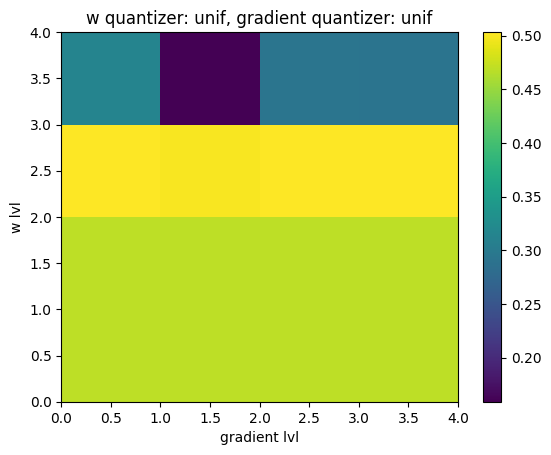

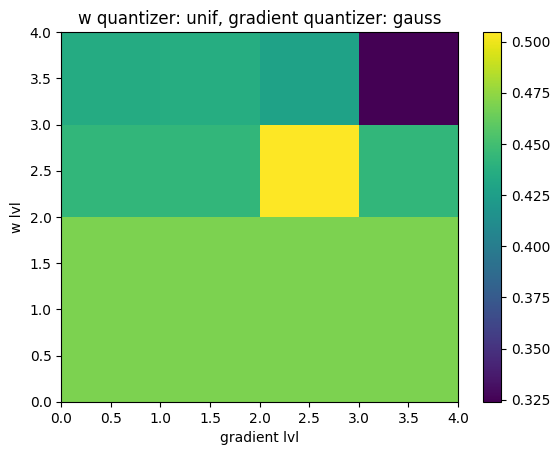

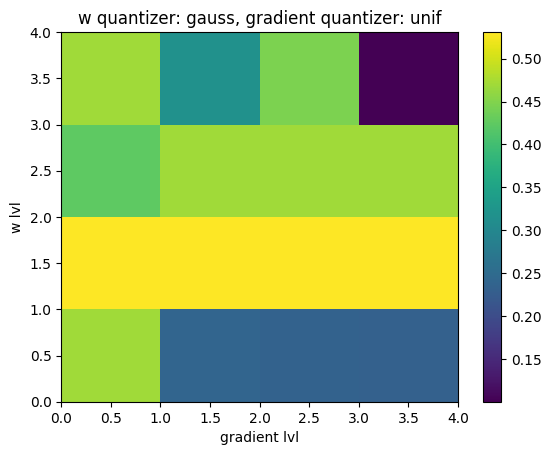

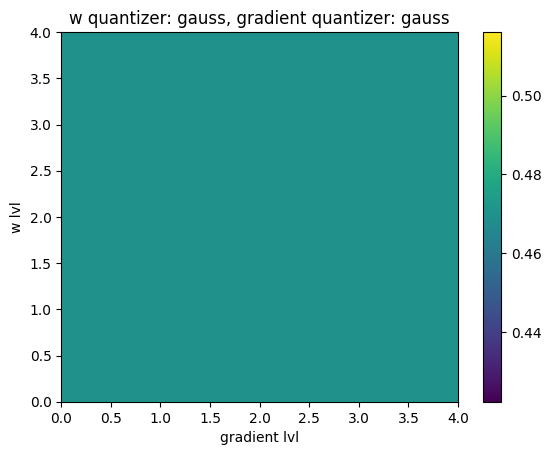

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from experiment import experiment
from experiment import test_loss
import random
scaler = MinMaxScaler(feature_range=(-1, 1))

from gen_data import gen_data
X,y = gen_data()
X = scaler.fit_transform(X)

bias = np.ones((X.shape[1],1)).T
X = np.vstack((bias, X)).astype(float)

experiment(X,y)

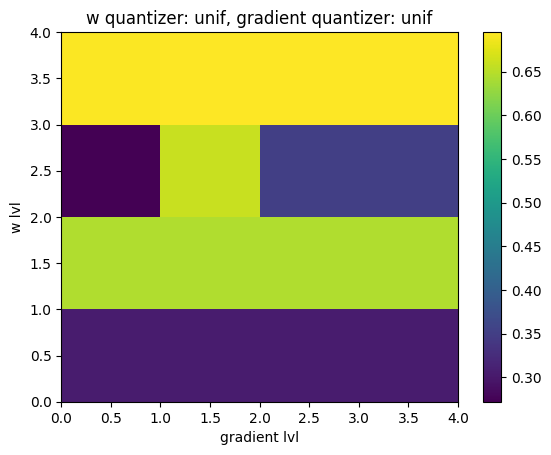

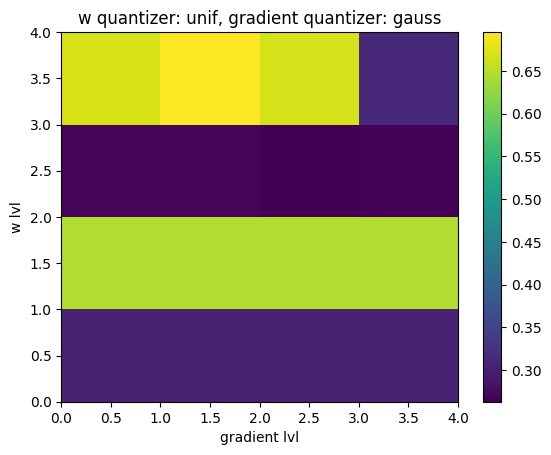

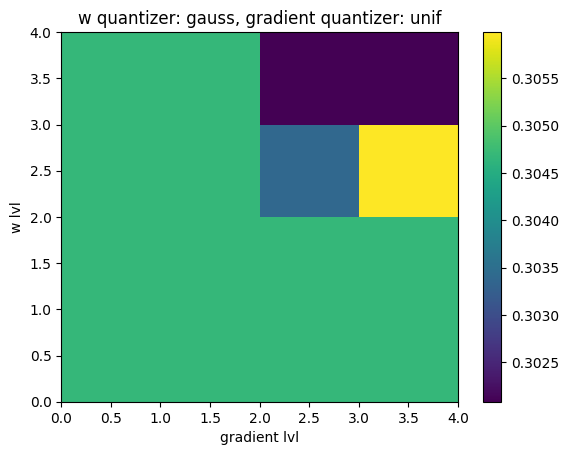

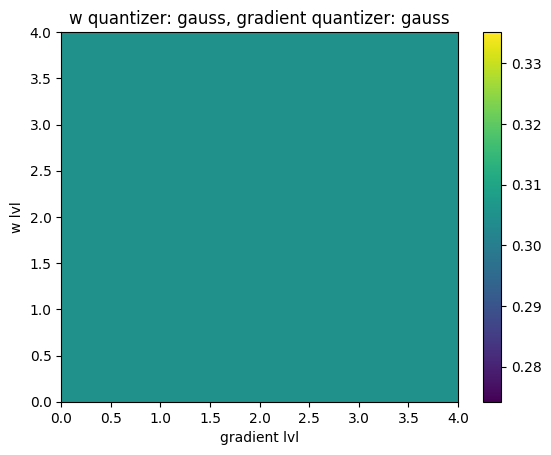

In [2]:

#loading and sorting the data
diabetes_data = pd.read_csv("diabetes.csv").to_numpy()
diabetes_x = diabetes_data[:,:-1]
diabetes_y = diabetes_data[:,-1]
diabetes_y = np.where(diabetes_y == 0,-1, diabetes_y)
# avoid overflow error

diabetes_x = scaler.fit_transform(diabetes_x)
bias = np.ones((diabetes_x.shape[0],1))
diabetes_x = np.hstack((bias,diabetes_x))
experiment(diabetes_x.T,diabetes_y.T)

In [5]:
#mse for different levels
from QuantLog import quantlogistic
from NormalLog import normallogistic
from sklearn.metrics import mean_squared_error
quantizers = ['unif', 'gauss']
levels = [1,2,3,4]
func = quantlogistic
w0 = np.random.uniform(-1, 1, (X.shape[0], 1))
mse_grid = np.zeros((2,4))
for i,type_q in enumerate(quantizers):
    for j, level_q in enumerate(levels):
        loss, grad_q = quantlogistic(w0,X,y,level_q, type_q)
        loss, grad = normallogistic(w0,X,y)
        mse = mean_squared_error(grad,grad_q)
        mse_grid[i,j] = mse




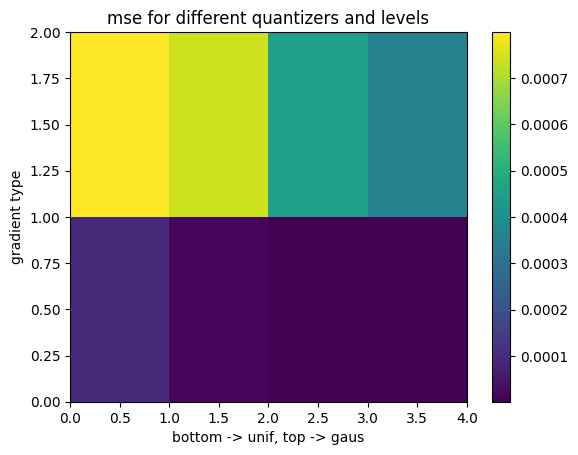

In [8]:
import matplotlib.pyplot as plt
xlabel = "gradient lvl"
ylabel = "gradient type"
plt.pcolormesh(mse_grid)
plt.colorbar()
plt.xlabel('bottom -> unif, top -> gaus')
plt.ylabel(ylabel)
plt.title('mse for different quantizers and levels')
plt.show()